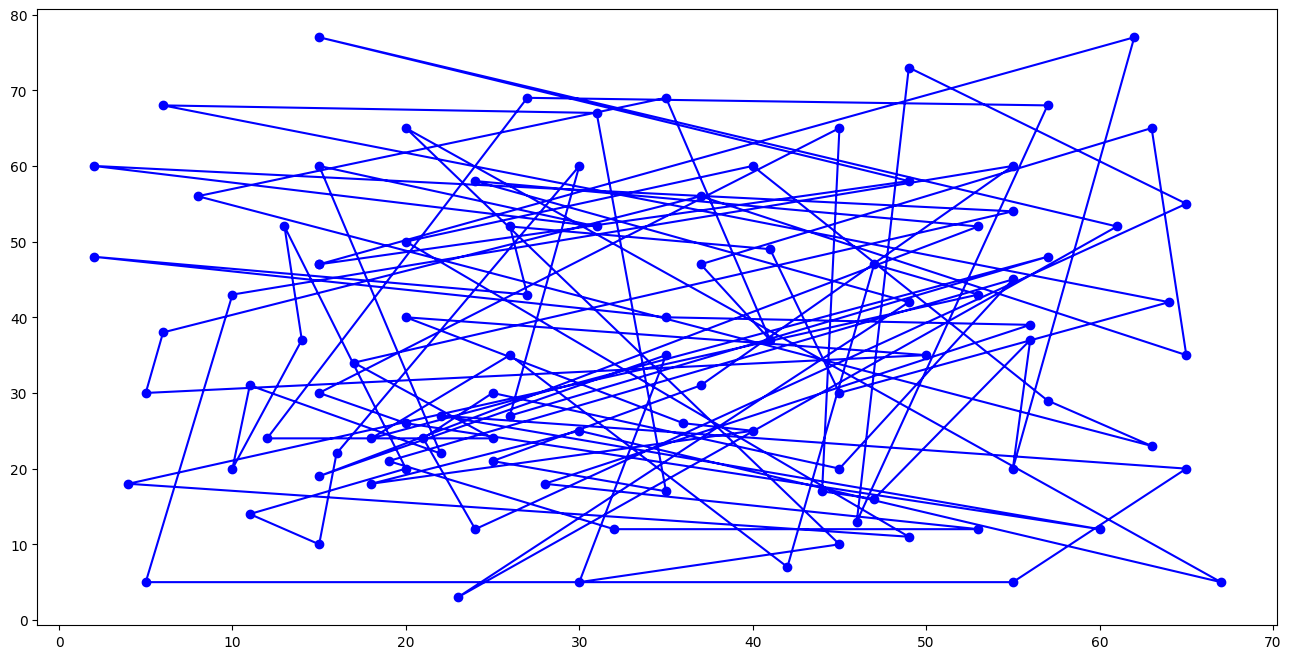

3176.325550189631


In [3]:
%matplotlib inline
import random, numpy, math, copy, matplotlib.pyplot as plt
import numpy as np

class City:
    """class for the coordinates of a location """
    def __init__(self, coords):
        self.x = int(coords[0])
        self.y = int(coords[1])
    
    def distance(self, city):
        """
        Euclidean distance between two locations
        """
        xDis = self.x - city.x
        yDis = self.y - city.y
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"
    
    #def getCoord(self):
    #    return [self.x, self.y]

class TSP:
    def __init__(self, filename = None, cities_no = 10):
        """
         random generation of location coordinates / reading data from a .tsp file 
        """
        if filename is None:
            self.N = cities_no
            self.cities = [City(random.sample(range(100), 2)) for i in range(self.N)];
        else:
            self.N, self.cities = self.___read_TSP_file(filename)
        
    def ___read_TSP_file(self, filename):
        nodelist = []

        # Open input file
        with open(filename, 'r') as infile:

            # Read instance header
            Name = infile.readline().strip().split()[1] # NAME
            FileType = infile.readline().strip().split()[1] # TYPE
            Comment = infile.readline().strip().split()[1] # COMMENT
            Dimension = infile.readline().strip().split(":")[1] # DIMENSION
            EdgeWeightType = infile.readline().strip().split()[1] # EDGE_WEIGHT_TYPE
            infile.readline()

            # Read node list
            N = int(Dimension)
            for i in range(N):
                coords = infile.readline().strip().split()[1:]
                nodelist.append(City(coords))

        return N, nodelist
    
    def eval(self, tour):
        """computation of a tour cost"""
        val = 0
        for i in range(self.N-1):
            val += self.cities[tour[i]].distance(self.cities[tour[i+1]])
        val += self.cities[tour[0]].distance(self.cities[tour[self.N-1]])
        return val
    
    def displayTour(self, tour):
        """plot the tour"""
        
        plt.figure(figsize = (16,8))

        plt.axes()
        plt.plot([self.cities[tour[i % self.N]].x for i in range(self.N+1)], [self.cities[tour[i % self.N]].y for i in range(self.N+1)], 'bo-')
        plt.show()
    
    def init_solution(self):
        """initial solution - random perturbation"""
        return random.sample(range(self.N), self.N)

    def perturb_solution(self, S):
        """2-opt perturbation"""
        i, j = random.sample(range(self.N),2)
        if i > j: i,j=j,i
        new_S = S.copy()
        for k in range((j-i)//2):
            new_S[i+k],new_S[j-k]=new_S[j-k],new_S[i+k]
        return new_S
    
# prob = TSP("eil51.tsp")
prob = TSP("../data/tsp/eil101.tsp")

tour = random.sample(range(prob.N),prob.N); # random initial tour
prob.displayTour(tour)
print(prob.eval(tour))

3208.0379664212396 1000.0
3176.119439973556 999.5
3136.411544957923 998.5007498750001
3135.0336778120877 994.0164725309133
3124.4998165197503 562.0614755236909
3113.843601651695 485.6920197431901
3101.3084715635955 402.2314133444043
3096.426918023109 397.2335727094168
3091.0640004994775 395.4495925665532
3049.8292856258204 394.659286358109
3026.226103212439 391.12240831871543
3005.238621510663 183.79697704471732
3000.933978381519 90.03093453456546
2969.2324361512565 89.98591906729818
2932.982107166383 89.94092610776454
2927.121372424089 69.90170613952102
2916.048050982767 69.86675528645127
2901.5692180156802 69.7271265410823
2867.9821300310805 69.69226297781177
2844.2820831338754 69.65741684632286
2837.210340011524 69.55298295540884
2833.421518493387 69.30991236408327
2826.7800325188555 69.17139646957305
2810.679324672405 69.13681077133828
2791.2174432945276 61.22508071594488
2785.1492175966146 61.194468175586906
2718.123344741664 61.16387094149911
2677.8585782521136 61.13328900602836


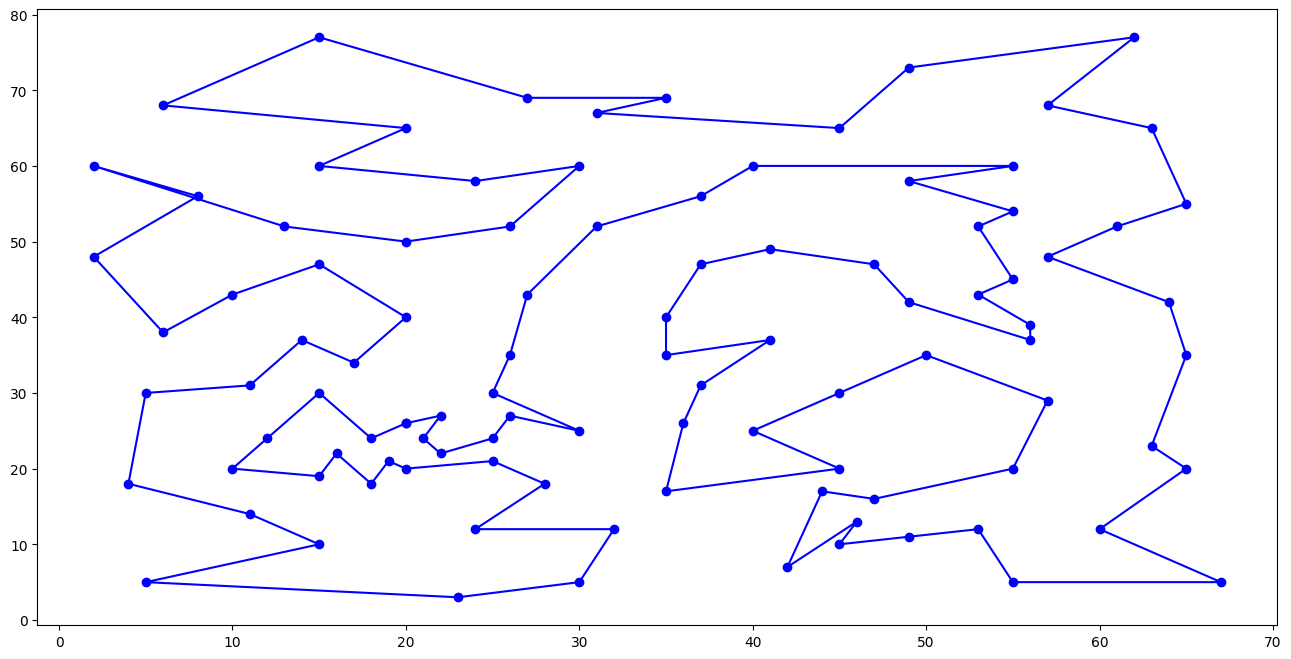

best 728.6614895341455


In [4]:
import random
import math

# acceptance probability
def accept(current_cost, new_cost, T):
    if new_cost <= current_cost:
        return True 
    if random.random() < np.exp(-(new_cost-current_cost)/T) : 
        return True
    else: 
        return False
    
# cooling schedule
def updateTemperature(T, k):
    return  T*0.9995
    #return T/k

# Simulated Annealing algorithm    
def SA(prob, T_Max, T_Min):
    S = prob.init_solution()
    S_cost = prob.eval(S)
    
    #prob.displayTour(S)
    
    S_best = S
    S_best_cost = S_cost
    
    T = T_Max
    k=0
    while T > T_Min:
        k=k+1
        S_prim = prob.perturb_solution(S)
        S_prim_cost = prob.eval(S_prim)
        
        if accept(S_cost, S_prim_cost, T):
            S = S_prim.copy()
            S_cost = S_prim_cost
        if S_cost < S_best_cost:
            S_best = S.copy()
            S_best_cost = S_cost
            print(S_best_cost, T)
            
        T = updateTemperature(T,k)
    
    return S_best_cost, S

best, S = SA(prob, 1000., 0.000001)
prob.displayTour(S)
print("best", best)